In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import List
from sklearn.preprocessing import minmax_scale

In [5]:
def codes_plot(data: np.ndarray, labels: List):
    (row_len, col_len, depth_len) = data.shape
    data = data.reshape(row_len * col_len, depth_len)
    data = minmax_scale(data, axis=0)

    ncol: int = int(np.sqrt(data.shape[0]))
    nrow: int = int(np.sqrt(data.shape[0]))

    nvector: int = int(data.shape[1])
    facecolors: List = []
    cmap = mpl.colormaps["jet"]

    for idx in range(nvector):
        facecolors.append(cmap(0.05 + 1/nvector * idx))

    position: np.ndarray = np.zeros([nrow, ncol])
    cnt: int = 1
    for row in range(nrow):
        for col in range(ncol):
            position[col, (nrow - 1) - row] = cnt
            cnt += 1
    position = position.reshape(nrow * ncol)

    fig = plt.figure(10, figsize=(9, 9))
    for cnt in range(ncol*nrow):
        ax = fig.add_subplot(nrow, ncol, int(position[cnt]), polar=True)
        num = len(data[0])
        theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / num)
        radii = data[cnt]
        width = np.pi / (num/2)
        bars = plt.bar(theta, radii, width=width, bottom=0.0)

        idx = 0
        for bar, label in zip(bars, labels):
            bar.set_facecolor(facecolors[idx])
            bar.set_alpha(0.5)

            # if cnt == int(nrow / 2):
            # if cnt == ((ncol * nrow - 1) - int(ncol / 2)):
            if cnt == int(nrow * nrow / 2):
                bar.set_label(label)
                # ax.legend(loc='upper center',
                #           bbox_to_anchor=(0.5, -0.05),
                #           fancybox=True,
                #           shadow=True, ncol=5)
            idx += 1

        # ax.set_title(cnt+1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(False)
        # ax.spines['polar'].set_visible(False)

    fig.subplots_adjust(hspace=0, wspace=0)
    plt.show()

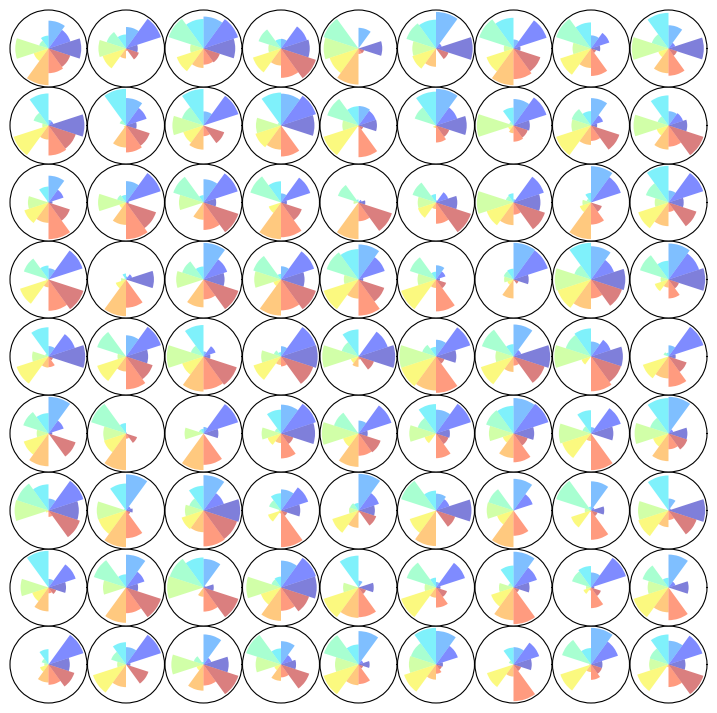

In [6]:
if __name__ == "__main__":
    np.random.seed(1)
    data: np.ndarray = np.random.rand(9, 9, 10)

    codes_plot(data, [i for i in range(10)])